In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("jamb_exam_results.csv")
df.head()

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


In [25]:
df.shape

(5000, 16)

In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

## Preparation

In [8]:
#Dropping Student_id Column

df.drop(columns=['student_id'],inplace = True)

In [9]:
#Filling missing values
df.isna().sum()

jamb_score                        0
study_hours_per_week              0
attendance_rate                   0
teacher_quality                   0
distance_to_school                0
school_type                       0
school_location                   0
extra_tutorials                   0
access_to_learning_materials      0
parent_involvement                0
it_knowledge                      0
age                               0
gender                            0
socioeconomic_status              0
parent_education_level          891
assignments_completed             0
dtype: int64

In [12]:
df['parent_education_level'].value_counts(dropna=False)

parent_education_level
Secondary    1556
Primary      1335
Tertiary     1218
NaN           891
Name: count, dtype: int64

In [20]:
value = df['parent_education_level'].mode().values[0]
df['parent_education_level'].fillna(value,inplace=True)

In [21]:
df.head()

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,15,Male,High,Secondary,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,22,Female,Medium,Tertiary,1


In [22]:
X = df.drop(columns=['jamb_score'])
y = df['jamb_score']

In [23]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.25,random_state=1)
print(X_train.shape,X_val.shape,y_train.shape,y_val.shape)


(4000, 15) (1000, 15) (4000,) (1000,)
(3000, 15) (1000, 15) (3000,) (1000,)


In [24]:
print(f"Shape of train Set : X {X_train.shape}\t Y : {y_train.shape}")
print(f"Shape of test Set : X {X_test.shape}\t Y : {y_test.shape}")
print(f"Shape of Val Set : X {X_val.shape}\t Y : {y_val.shape}")

Shape of train Set : X (3000, 15)	 Y : (3000,)
Shape of test Set : X (1000, 15)	 Y : (1000,)
Shape of Val Set : X (1000, 15)	 Y : (1000,)


In [28]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=True)

X_train_tr = dv.fit_transform(X_train.to_dict(orient='records'))
X_test_tr = dv.transform(X_test.to_dict(orient='records'))

## Question 01

In [29]:
from sklearn.tree import DecisionTreeRegressor

In [30]:
dt = DecisionTreeRegressor(max_depth=1)

In [32]:
dt.fit(X_train_tr,y_train)

DecisionTreeRegressor(max_depth=1)

In [40]:
dv.get_feature_names_out()

array(['access_to_learning_materials=No',
       'access_to_learning_materials=Yes', 'age', 'assignments_completed',
       'attendance_rate', 'distance_to_school', 'extra_tutorials=No',
       'extra_tutorials=Yes', 'gender=Female', 'gender=Male',
       'it_knowledge=High', 'it_knowledge=Low', 'it_knowledge=Medium',
       'parent_education_level=Primary',
       'parent_education_level=Secondary',
       'parent_education_level=Tertiary', 'parent_involvement=High',
       'parent_involvement=Low', 'parent_involvement=Medium',
       'school_location=Rural', 'school_location=Urban',
       'school_type=Private', 'school_type=Public',
       'socioeconomic_status=High', 'socioeconomic_status=Low',
       'socioeconomic_status=Medium', 'study_hours_per_week',
       'teacher_quality'], dtype=object)

In [50]:
feature_names = dv.get_feature_names_out(input_features=X_train.columns)
split_feature_idx = dt.tree_.feature[0]
split_feature = feature_names[split_feature_idx]

print(f"Feature used for splitting: {split_feature}")

Feature used for splitting: study_hours_per_week


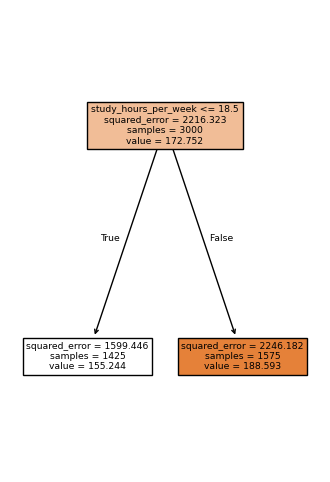

In [43]:

import matplotlib.pyplot as plt
from sklearn import tree
# Plot the decision tree
fig, ax = plt.subplots(figsize=(4, 6))
tree.plot_tree(dt,feature_names= dv.get_feature_names_out(),filled=True, ax=ax)
plt.show()


## Question 02

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
rfr = RandomForestRegressor(
    n_estimators=10,
    random_state=1,
    n_jobs=-1
)

In [46]:
rfr.fit(X_train_tr,y_train)


RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [48]:
X_val_tr = dv.transform(X_val.to_dict(orient='records'))
preds = rfr.predict(X_val_tr)

In [49]:
from sklearn.metrics import root_mean_squared_error

print(root_mean_squared_error(y_val,preds))

42.253360576408596


## Question 03

In [53]:
estimators = [i for i in range(10,201,10)]
scores = []
for e in estimators:
    model = RandomForestRegressor(n_estimators=e,random_state=1)
    model.fit(X_train_tr,y_train)
    preds = model.predict(X_val_tr)
    score = round(root_mean_squared_error(y_val,preds),3)
    scores.append(score)
    print(f"Estimators : {e} \t Score : {score}")

Estimators : 10 	 Score : 42.253
Estimators : 20 	 Score : 41.505
Estimators : 30 	 Score : 41.108
Estimators : 40 	 Score : 40.833
Estimators : 50 	 Score : 40.729
Estimators : 60 	 Score : 40.702
Estimators : 70 	 Score : 40.661
Estimators : 80 	 Score : 40.554
Estimators : 90 	 Score : 40.543
Estimators : 100 	 Score : 40.57
Estimators : 110 	 Score : 40.601
Estimators : 120 	 Score : 40.603
Estimators : 130 	 Score : 40.639
Estimators : 140 	 Score : 40.579
Estimators : 150 	 Score : 40.589
Estimators : 160 	 Score : 40.634
Estimators : 170 	 Score : 40.642
Estimators : 180 	 Score : 40.634
Estimators : 190 	 Score : 40.627
Estimators : 200 	 Score : 40.609


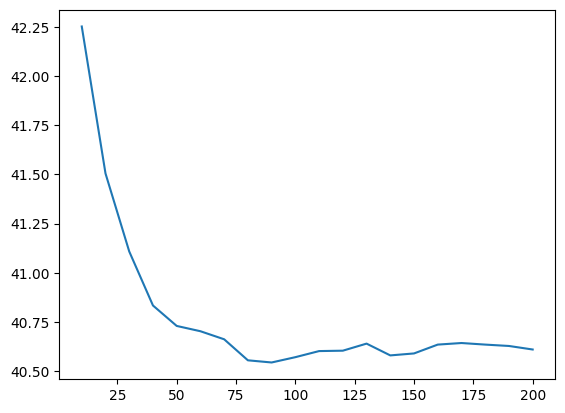

In [56]:
plt.plot(estimators,scores)

In [58]:
estimators = [i for i in range(10,201,10)]
depths = [10, 15, 20, 25]
scores = []

for depth in depths:
    sc = []
    for e in estimators:
        model = RandomForestRegressor(n_estimators=e,random_state=1,max_depth=depth,n_jobs=-1)
        model.fit(X_train_tr,y_train)
        preds = model.predict(X_val_tr)
        score = round(root_mean_squared_error(y_val,preds),3)
        sc.append(score)
    mean_score = sum(sc)/len(sc)
    scores.append(mean_score)
    print(f"Depth : {depth} \t Score : {mean_score}")
    

Depth : 10 	 Score : 40.45470000000001
Depth : 15 	 Score : 40.741099999999996
Depth : 20 	 Score : 40.83135
Depth : 25 	 Score : 40.77759999999999


## Question 05

In [59]:
model = RandomForestRegressor(
    n_estimators=10,
    max_depth = 20,
    random_state=1,
    n_jobs=-1
)

In [61]:
model.fit(X_train_tr,y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [62]:
model.feature_importances_

array([0.01043106, 0.01149072, 0.06984446, 0.03137019, 0.15077233,
       0.13800842, 0.01225357, 0.01061819, 0.01113196, 0.0086238 ,
       0.01801153, 0.01260863, 0.00921383, 0.01429254, 0.01400105,
       0.01420764, 0.02317315, 0.01268501, 0.01183775, 0.01061975,
       0.01042202, 0.01016087, 0.00698768, 0.02622583, 0.01115271,
       0.01023575, 0.24628174, 0.08333781])

In [73]:
cols = [
    'study_hours_per_week',
    'attendance_rate',
    'distance_to_school',
    'teacher_quality'
]
results = pd.DataFrame({'Features':dv.get_feature_names_out(),'Importance':model.feature_importances_})
results[results['Features'].isin(cols)].sort_values(by='Importance',ascending=False) 

,Features,Importance
26,study_hours_per_week,0.246282
4,attendance_rate,0.150772
5,distance_to_school,0.138008
27,teacher_quality,0.083338


In [79]:
import xgboost as xgb
from xgboost import DMatrix
# from sklearn.model_selection import cross_val_score, KFold

# Define your XGBoost parameters
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

# Create a DMatrix for your data (assuming you have X_train and y_train)
data_dmatrix = DMatrix(data=X_train_tr, label=y_train)

val_matrix = DMatrix(X_val_tr)
xgb_model = xgb.train(params=xgb_params, dtrain=data_dmatrix, num_boost_round=100)
preds = xgb_model.predict(val_matrix)
rmse = root_mean_squared_error(y_val,preds)

# Use a custom scoring function to calculate RMSE


print(f'RMSE: {rmse:.4f}')


RMSE: 44.0773


In [80]:

# Define your XGBoost parameters
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

# Create a DMatrix for your data (assuming you have X_train and y_train)
data_dmatrix = DMatrix(data=X_train_tr, label=y_train)

val_matrix = DMatrix(X_val_tr)
xgb_model = xgb.train(params=xgb_params, dtrain=data_dmatrix, num_boost_round=100)
preds = xgb_model.predict(val_matrix)
rmse = root_mean_squared_error(y_val,preds)

# Use a custom scoring function to calculate RMSE


print(f'RMSE: {rmse:.4f}')


RMSE: 41.1890
